In [2]:
###########################################
%matplotlib inline
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
###########################################
%pwd

'/home/david/projectos/voltrad1/notebooks'

In [5]:
import persist.sqlite_methods as pp

df= pp.get_yahoo_option_dataframe("SPY", "2019-11", "", "")
df.columns
df[df["Strike"]==206]
subset_df=df.iloc[(df['Strike'] - df['Underlying_Price']).abs().argsort()[:4]]
subset_df

,Quote_Time,Strike,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,...,IV,Root,IsNonstandard,Underlying,Underlying_Price,Last_Trade_Date,JSON,Quote_Time_txt,Last_Trade_Date_txt,Expiry_txt
124279,2019-10-18 14:10:07,299.0,call,SPY191104C00299000,3.20,3.21,3.24,-0.27,-7.780979,7.0,...,0.122323,SPY,0,SPY,299.0,2019-10-18 13:36:49,,2019-10-18 14:10:07,2019-10-18 13:36:49,2019-11-04 00:00:00
16013,2019-08-14 16:10:08,285.0,put,SPY191115P00285000,10.43,10.45,10.51,3.43,49.000004,962.0,...,0.182290,SPY,0,SPY,285.0,2019-08-14 15:44:54,,2019-08-14 16:10:08,2019-08-14 15:44:54,2019-11-15 00:00:00
326158,2019-11-19 16:09:58,311.5,call,SPY191120C00311500,0.93,0.89,0.90,-0.22,-19.130432,2426.0,...,0.097909,SPY,0,SPY,311.5,2019-11-19 15:33:06,,2019-11-19 16:09:58,2019-11-19 15:33:06,2019-11-20 00:00:00
218773,2019-10-31 19:10:07,302.5,call,SPY191122C00302500,3.41,3.40,3.42,-0.77,-18.421047,552.0,...,0.112863,SPY,0,SPY,302.5,2019-10-31 18:53:35,,2019-10-31 19:10:07,2019-10-31 18:53:35,2019-11-22 00:00:00


In [6]:
df.shape

(353385, 21)

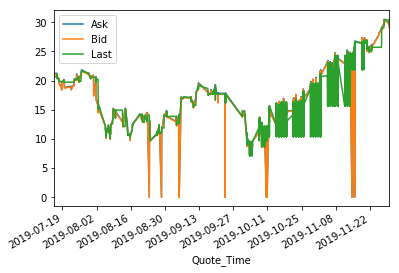

In [7]:
df2 = df[(df.Strike == 285.0) & (df.Type == "call")]
x_col = 'Quote_Time'
y_cols = ['Ask','Bid','Last']
df2=df2.loc[:,[x_col] + y_cols].dropna()
df2.loc[:,y_cols] \
    = df2.loc[:,y_cols].apply(pd.to_numeric, errors='coerce')
df2.loc[:,x_col]=pd.to_datetime(df2.loc[:,x_col], format="%Y-%m-%d %H:%M:%S")
df2.index = df2[x_col]
del df2[x_col]
df2.plot()